<a href="https://colab.research.google.com/github/aihtn2708/Stocks_price_Analysis_Application/blob/main/Stock_price_Analysis_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will build interactive dashboards & visualizations that help us understand the stock market better.

## Step 1: Build a stock price visualization tool


In [ ]:
!pip install yfinance
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
# List of stock tickers
stock_list = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX', 'UBER']

# Dictionary of time horizons
time_horizons = {
    '1 Month': 30,
    '3 Months': 90,
    '6 Months': 180,
    '1 Year': 365
}

In [ ]:
# Stock selection dropdown
stock_dropdown = widgets.Dropdown(
    options=stock_list,
    value='AAPL',
    description='Stock:',
)

# Time horizon dropdown
time_dropdown = widgets.Dropdown(
    options=list(time_horizons.keys()),
    value='1 Month',
    description='Time Horizon:',
)

In [ ]:
def update_plot(stock_ticker, time_period):
    # Clear current output
    clear_output(wait=True)

    # Display widgets
    display(stock_dropdown, time_dropdown)

    # Calculate the start and end dates
    days = time_horizons[time_period]
    end_date = datetime.today()
    start_date = end_date - timedelta(days=days)

    # Fetch data from Yahoo Finance
    data = yf.download(stock_ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

    # Check if data is available
    if data.empty:
        print("No data available for the selected stock and time horizon.")
        return

    # Reset index to get 'Date' as a column
    data.reset_index(inplace=True)

    # Ensure 'Date' is in datetime format
    data['Date'] = pd.to_datetime(data['Date'])

    # Extract 'Date' and 'Close' columns as 1D arrays
    dates = data['Date'].values.flatten()
    close_prices = data['Close'].values.flatten()

    # Set seaborn style
    sns.set_style('whitegrid')

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=dates, y=close_prices)
    plt.title(f"{stock_ticker} Stock Price Over the Last {time_period}")
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Link widgets to the function
interactive_plot = widgets.interactive(
    update_plot,
    stock_ticker=stock_dropdown,
    time_period=time_dropdown
)

# Display the interactive widgets
display(interactive_plot)

interactive(children=(Dropdown(description='Stock:', options=('AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX',…

## Step 2: Refine the stock price visualization tool, add custom date pickers, and more indicators.

1. Simple Moving Average (SMA)
Definition: The Simple Moving Average calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.
Purpose: It smooths out price data to identify the trend direction over a period.
Usage: Traders use SMA to determine if the asset price will continue or reverse a bull or bear trend.
2. Exponential Moving Average (EMA)
Definition: The Exponential Moving Average gives more weight to recent prices, making it more responsive to new information.
Purpose: EMA reacts faster to recent price changes compared to SMA.
Usage: Traders use EMA to spot price trends, as it can signal a change in the market earlier than SMA.
3. Bollinger Bands
Definition: Bollinger Bands consist of a middle band (usually a 20-day SMA) and two outer bands set two standard deviations above and below the middle band.
Purpose: They measure market volatility and provide a high and low range within which a security typically trades.
Usage: Traders use Bollinger Bands to identify overbought or oversold conditions and to predict possible price reversals.

In [ ]:
# Import libraries
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta
import ipywidgets as widgets
from IPython.display import display, clear_output

# Ensure matplotlib plots display inline
%matplotlib inline

In [ ]:
# List of stock tickers
stock_list = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX', 'UBER']

# Stock selection dropdown
stock_dropdown = widgets.Dropdown(
    options=stock_list,
    value='AAPL',
    description='Stock:',
)

# Start date picker
start_date_picker = widgets.DatePicker(
    description='Start Date',
    disabled=False,
    value=datetime.today() - timedelta(days=60)  # Default to 1 month ago
)

# End date picker
end_date_picker = widgets.DatePicker(
    description='End Date',
    disabled=False,
    value=datetime.today()
)

# Indicator selection dropdown
indicator_options = ['None', 'Simple Moving Average', 'Exponential Moving Average', 'Bollinger Bands']
indicator_dropdown = widgets.Dropdown(
    options=indicator_options,
    value='None',
    description='Indicator:',
)

In [ ]:
# Define the plotting function
def update_plot(stock_ticker, start_date, end_date, indicator):
    # Clear current output
    clear_output(wait=True)

    # Display widgets
    display(stock_dropdown, start_date_picker, end_date_picker, indicator_dropdown)

    # Validate dates
    if start_date is None or end_date is None:
        print("Please select both start and end dates.")
        return

    if start_date >= end_date:
        print("Start date must be before end date.")
        return

    # Fetch data from Yahoo Finance
    data = yf.download(stock_ticker, start=start_date, end=end_date)

    # Check if data is available
    if data.empty:
        print("No data available for the selected stock and date range.")
        return

    # Reset index to get 'Date' as a column
    data.reset_index(inplace=True)

    # Calculate indicators
    if indicator == 'Simple Moving Average':
        data['SMA'] = data['Close'].rolling(window=20).mean()
    elif indicator == 'Exponential Moving Average':
        data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
    elif indicator == 'Bollinger Bands':
        data['SMA'] = data['Close'].rolling(window=20).mean()
        data['STD'] = data['Close'].rolling(window=20).std()
        data['Upper'] = data['SMA'] + (data['STD'] * 2)
        data['Lower'] = data['SMA'] - (data['STD'] * 2)

    # Set seaborn style
    sns.set_style('whitegrid')

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')

    # Plot the selected indicator
    if indicator == 'Simple Moving Average':
        plt.plot(data['Date'], data['SMA'], label='SMA (20 days)')
    elif indicator == 'Exponential Moving Average':
        plt.plot(data['Date'], data['EMA'], label='EMA (20 days)')
    elif indicator == 'Bollinger Bands':
        plt.plot(data['Date'], data['SMA'], label='SMA (20 days)')
        plt.plot(data['Date'], data['Upper'], label='Upper Band')
        plt.plot(data['Date'], data['Lower'], label='Lower Band')
        plt.fill_between(data['Date'], data['Lower'], data['Upper'], color='gray', alpha=0.3)

    plt.title(f"{stock_ticker} Stock Price")
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Link widgets to the function
interactive_plot = widgets.interactive(
    update_plot,
    stock_ticker=stock_dropdown,
    start_date=start_date_picker,
    end_date=end_date_picker,
    indicator=indicator_dropdown
)

# Display the interactive widgets
display(interactive_plot)

interactive(children=(Dropdown(description='Stock:', options=('AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX',…

## Step 3: Build a financial news sentiment analysis bot.

Financial news articles: from [Finnhub API](https://finnhub.io/docs/api).
**NOTE: Finnhub's free API for news returns lets you analyze one stock and 5 news stories only in your given time period — you need premium access to get all the stocks and news stories.**

Create a free API key by:

1. In a new browser tab, go to https://finnhub.io/
2. Click on "Get a free API key"
3. Enter your name, email, and password, and click register.
4. Copy the API key.
5. Return to your Colab notebook and use the left-hand navigation bar to open the Secrets pane.
6. Name your API key "finnhubAPI".
7. Paste the API key into the value textbox.
8. Change the Notebook Access slider to "on".

```py
from google.colab import userdata
finnhub_API = userdata.get('finnhubAPI')
```

In [ ]:
!pip install requests pandas vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime

In [ ]:
from google.colab import userdata
finnhub_API = userdata.get('finnhubAPI')

In [ ]:
def fetch_news(stock_symbol, api_key):
    url = f'https://finnhub.io/api/v1/company-news?symbol={stock_symbol}&from=2020-01-01&to={datetime.today().strftime("%Y-%m-%d")}&token={finnhub_API}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch news for {stock_symbol}")
        return []


In [ ]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(headline):
    score = analyzer.polarity_scores(headline)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
def analyze_news_sentiment(stock_list, api_key):
    all_news = []
    for stock in stock_list:
        news_items = fetch_news(stock, api_key)
        for item in news_items:
            date = datetime.fromtimestamp(item['datetime']).strftime('%Y-%m-%d')
            title = item['headline']
            sentiment = get_sentiment(title)
            all_news.append({
                'Stock': stock,
                'Date': date,
                'Title': title,
                'Sentiment': sentiment
            })
    df = pd.DataFrame(all_news, columns=['Stock', 'Date', 'Title', 'Sentiment'])
    return df


In [ ]:
# List of stock symbols
stock_list = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX', 'UBER']

# Analyze news sentiment
df = analyze_news_sentiment(stock_list, finnhub_API)

# Display the DataFrame
df[0:100]

,Stock,Date,Title,Sentiment
0,AAPL,2024-12-07,Why Is Apple Inc. (AAPL) Among the Best Tech S...,Positive
1,AAPL,2024-12-07,Berkshire Hathaway: Cash Is King When Empires ...,Neutral
2,AAPL,2024-12-07,DUBS: The Yield Boost Is Not Worth The Return Cut,Neutral
3,AAPL,2024-12-07,CFPB Moves to Supervise Google Payments Under ...,Neutral
4,AAPL,2024-12-06,"Dow Jones Futures: Nasdaq Nears 20,000 But Wat...",Neutral
...,...,...,...,...
95,AAPL,2024-12-03,Why Shopify Could Be the Best Stock to Buy in ...,Positive
96,AAPL,2024-12-03,"Intel Was a Tech Titan, Its Downfall Sends a W...",Negative
97,AAPL,2024-12-03,"Amazon's cloud service shows new AI servers, s...",Neutral
98,AAPL,2024-12-03,Harding Loevner Global Developed Markets Equit...,Neutral


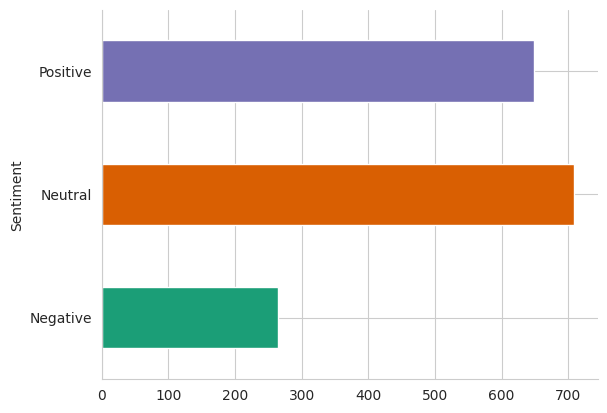

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)